# Time Series Analysis
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* Lets convert some data into timestamps, and do some fun stuff with it

### Key commands

| command | description |
|---------|-------------|
| pd.Series.to_datetime() | convert column to datetime series |
| pd.Timestamp | converts a single value to a timestamp |
| pd.date_range() | creates a list of timestamps |
| ts[a:b] | slices a DateTimeIndex by two dates |
| pd.DateTimeIndex.resample() | rebuilds a DateTimeIndex with a specific interval |
| downsampling | converts to less data points, condenses |
| upsampling | converts to more data points, interpolates |
| pd.DateTimeIndex.shift() | moves column by 1 |
| pandas.Series.diff() | calculate difference to previous period |
| pandas.Series.pct_change() | difference as percentage |
| pd.Period | data type for periods |
| pd.period_range() | creates a list of periods |
| pd.Series.rolling() | groups with sliding window along the time axis |
| pd.rolling.mean() | summarizes the data groupwise |

**Pull in a csv file which contains time/date information**

**We'll use some stock data taken from pandas_datareader**

**The average value-weighted returns from a series of financial data indices**

In [2]:
import pandas as pd

df = pd.read_csv('financial_monthly_data.csv')

**Let's have a look at the data types of the dataframe**

**In particular, we're interested in the date time data**

In [3]:
df.head()

,Date,Cnsmr,Manuf,HiTec,Hlth,Other
0,2010-01,-1.98,-4.02,-7.63,0.00,-1.65
1,2010-02,3.86,3.23,4.37,0.38,3.38
2,2010-03,6.33,4.74,6.92,3.61,8.43
3,2010-04,1.53,3.31,2.50,-2.22,2.15
4,2010-05,-5.71,-8.88,-7.31,-8.01,-8.82


In [4]:
df.dtypes

Date      object
Cnsmr    float64
Manuf    float64
HiTec    float64
Hlth     float64
Other    float64
dtype: object

**They are objects (ie non date time objects). What can we do with them?**

**Well we can interact with date times in string format.. But its clunky**

In [5]:
df[df['Date'].str.contains('2018')]

,Date,Cnsmr,Manuf,HiTec,Hlth,Other
96,2018-01,6.32,2.55,6.84,6.38,5.90
97,2018-02,-5.31,-5.94,-1.21,-3.90,-3.31
98,2018-03,-2.31,0.11,-3.18,-2.00,-2.65
99,2018-04,1.07,1.32,-0.48,-0.28,0.44
100,2018-05,0.59,2.40,5.76,2.43,1.20
101,2018-06,3.30,0.12,0.52,1.52,-1.02
102,2018-07,2.70,3.38,2.36,6.12,3.98
103,2018-08,4.71,-0.80,6.73,4.46,2.45
104,2018-09,0.32,1.60,0.02,1.99,-1.22
105,2018-10,-5.95,-8.81,-7.66,-8.84,-6.60


**Don't waste too much time manipulating your data for dates - so lets create a datetime series out of any columns with dates using pd.to_datetime**

In [6]:
df['DT'] = pd.to_datetime(df['Date'])
df.loc[0]['DT']

Timestamp('2010-01-01 00:00:00')

In [7]:
pd.to_datetime('1st jan 84, 19.45h')

Timestamp('1984-01-01 19:27:00')

**Now we can do cool stuff with the date time objects**

**Using Date Time Objects!**

* Easily extract more granular date information using **dt.'whatever'**
* Select rows for specific conditions - day, month, week, year
* Easily compare dates relatively

* Easily extract more granular date information using **dt.whatever**

In [8]:
df['DT'].dt.day.head() # only gives day in a column

0    1
1    1
2    1
3    1
4    1
Name: DT, dtype: int64

In [9]:
df['DT'].dt.month.head() # only gives day in a column

0    1
1    2
2    3
3    4
4    5
Name: DT, dtype: int64

In [10]:
df['DT'].dt.week.head() # only gives week of the new month in a column

0    53
1     5
2     9
3    13
4    17
Name: DT, dtype: int64

In [11]:
df['DT'].dt.hour.head() # only gives hour in a column

0    0
1    0
2    0
3    0
4    0
Name: DT, dtype: int64

In [12]:
df['DT'].dt.second.head() # only gives day in a column

0    0
1    0
2    0
3    0
4    0
Name: DT, dtype: int64

* Select rows for specific conditions - day, month, week, year

Can include booleans!

In [13]:
mask = (df['DT']>'1st jan 2017') & (df['DT'] < '2018/01/01')

df[mask]

,Date,Cnsmr,Manuf,HiTec,Hlth,Other,DT
85,2017-02,2.99,2.26,3.94,7.10,3.74,2017-02-01
86,2017-03,0.78,-0.18,1.91,-0.16,-1.68,2017-03-01
87,2017-04,1.81,0.32,2.22,1.09,0.24,2017-04-01
88,2017-05,2.00,0.32,3.10,-0.43,-0.43,2017-05-01
89,2017-06,-1.18,0.29,-2.13,5.56,4.20,2017-06-01
90,2017-07,-0.10,2.30,4.07,0.53,1.44,2017-07-01
91,2017-08,-1.55,-0.81,1.98,1.78,-0.39,2017-08-01
92,2017-09,1.73,4.68,0.17,1.50,4.31,2017-09-01
93,2017-10,1.66,2.21,4.61,-2.24,2.04,2017-10-01
94,2017-11,5.90,3.14,1.46,2.36,3.77,2017-11-01


* Easily compare dates relatively

#### Can compare dates in a two different date time columns 

In [14]:
(df['DT'] - df['DT']).head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: DT, dtype: timedelta64[ns]

* But wait, we can't compare times to themselves? 

**We can't compare times to themselves.** Lets do some more interesting stuff! 

#### More advanced date_time stuff
* Shift
* Rolling values
* Back/forward filling
* Filling in between the lines 
* etc


**Shift data** - shift data  

In [15]:
df['DT+1'] = df['DT'].shift(1)
df['Cnsmr+2'] = df['Cnsmr'].shift(2)
df.head()

,Date,Cnsmr,Manuf,HiTec,Hlth,Other,DT,DT+1,Cnsmr+2
0,2010-01,-1.98,-4.02,-7.63,0.00,-1.65,2010-01-01,NaT,NaN
1,2010-02,3.86,3.23,4.37,0.38,3.38,2010-02-01,2010-01-01,NaN
2,2010-03,6.33,4.74,6.92,3.61,8.43,2010-03-01,2010-02-01,-1.98
3,2010-04,1.53,3.31,2.50,-2.22,2.15,2010-04-01,2010-03-01,3.86
4,2010-05,-5.71,-8.88,-7.31,-8.01,-8.82,2010-05-01,2010-04-01,6.33


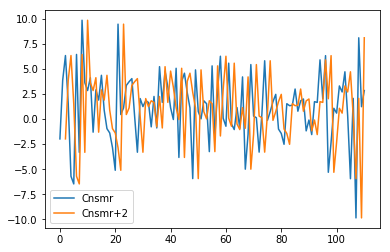

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
df['Cnsmr'].plot()
df['Cnsmr+2'].plot()
plt.legend()

**Or calculate some rolling values**

In [17]:
del df['DT+1']

In [18]:
df['Cnsmr_rolling_av'] = df['Cnsmr'].rolling(10).mean()
df

,Date,Cnsmr,Manuf,HiTec,Hlth,Other,DT,Cnsmr+2,Cnsmr_rolling_av
0,2010-01,-1.98,-4.02,-7.63,0.00,-1.65,2010-01-01,NaN,NaN
1,2010-02,3.86,3.23,4.37,0.38,3.38,2010-02-01,NaN,NaN
2,2010-03,6.33,4.74,6.92,3.61,8.43,2010-03-01,-1.98,NaN
3,2010-04,1.53,3.31,2.50,-2.22,2.15,2010-04-01,3.86,NaN
4,2010-05,-5.71,-8.88,-7.31,-8.01,-8.82,2010-05-01,6.33,NaN
5,2010-06,-6.47,-5.19,-5.77,-1.63,-7.65,2010-06-01,1.53,NaN
6,2010-07,6.44,8.48,7.98,2.15,7.48,2010-07-01,-5.71,NaN
7,2010-08,-3.32,-3.79,-5.54,-1.66,-7.55,2010-08-01,-6.47,NaN
8,2010-09,9.85,8.83,11.41,9.01,8.82,2010-09-01,6.44,NaN
9,2010-10,3.62,4.33,6.04,2.00,2.60,2010-10-01,-3.32,1.415


<Figure size 432x288 with 0 Axes>

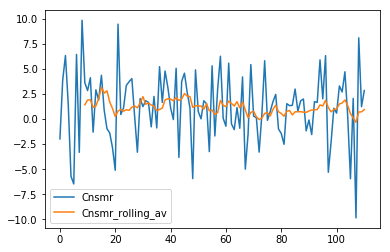

In [19]:
plt.figure()
df[['Cnsmr', 'Cnsmr_rolling_av']].plot()
plt.legend()
plt.show()

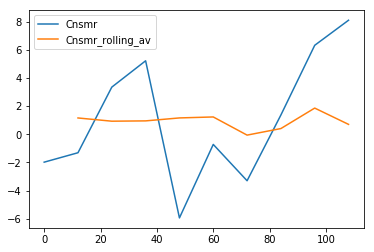

In [20]:
df[df['DT'].dt.month == 1][['Cnsmr', 'Cnsmr_rolling_av']].plot()

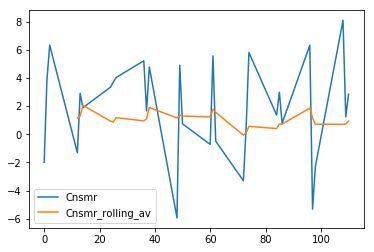

In [21]:
df[df['DT'].dt.quarter == 1][['Cnsmr', 'Cnsmr_rolling_av']].plot()

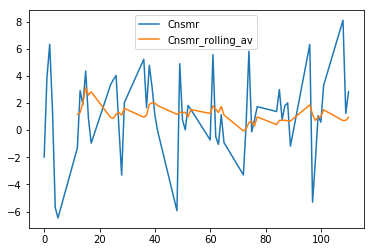

In [22]:
df[df['DT'].dt.month.between(0,6)][['Cnsmr', 'Cnsmr_rolling_av']].plot()

**Notice the window size, and the missing values we create - we can fill them in using fillna(method='')**

**But notice we only have monthly data...**

**Can we fill in more granular information?**

**Can we get weekly data from monthly?**

***(Spoiler: YES! using resample, and interpolate) - See later***

### The datetime module
The standard module datetime manages timestamps. Providing a list of timestamps can be used by pandas to create a DateTimeIndex:


In [23]:
import pandas as pd
import numpy as np
from datetime import datetime

# define a list of timestamps
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12),
         datetime(2011, 1, 14), datetime(2011, 1, 16), datetime(2011, 1, 17)]

In [24]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0),
 datetime.datetime(2011, 1, 14, 0, 0),
 datetime.datetime(2011, 1, 16, 0, 0),
 datetime.datetime(2011, 1, 17, 0, 0)]

In [25]:
# use timestamps as an index
ts = pd.Series(np.random.randn(9), index=dates)

In [26]:
ts

2011-01-02   -1.410046
2011-01-05    0.139667
2011-01-07    0.905215
2011-01-08   -2.447770
2011-01-10   -0.760145
2011-01-12   -0.450071
2011-01-14   -0.371709
2011-01-16    0.467901
2011-01-17    1.075581
dtype: float64

### Converting to timestamps
It is usually easier to use the pandas function as_timestamp. It parses the timestamps from many different notations:

In [27]:
dates = ['2011-01-2', '2011-01-5', '2011-01-7',
         '2011-01-8', '2011-01-10', '2011-01-12',
         '2011-01-14', '2011-01-16', '2011-01-17']

ts = pd.Series(np.random.randn(9), index=dates)

### Using DateTime indices
Time indices can be accessed very flexibly

In [43]:
ts[::2]

2011-01-2    -0.570071
2011-01-7    -0.510992
2011-01-10   -0.381581
2011-01-14    0.012997
2011-01-17   -0.296845
dtype: float64

In [ ]:
# ts['1/10/2011']
# ts['20110110']
# ts[datetime(2011, 1, 7):]
# ts['1/6/2011':'1/11/2011']

### Date Ranges
With pandas.date_range( ) you can create timestamp indices from scratch:

#### Create your own datetime series using pd.date_range()
* Start Date - specify your start date
* End Date - specify your end date
* Periods - specify the number of elements in the result
* Frequency - do you want days, weeks, seconds?

***N.B You can only input 3 of the 4***

In [44]:
pd.date_range('4/1/2012', '6/1/2012')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [45]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [47]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [49]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Example data
Here we load stock data from stock_px.csv

In [51]:
stocks_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [52]:
stocks = stocks_all[['AAPL', 'MSFT', 'XOM']]

In [54]:
stocks.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


##  Resampling

### change to a weekly timescale (downsampling)

In [61]:
stocks.resample('W').first().head()

,AAPL,MSFT,XOM
2003-01-05,7.40,21.11,29.22
2003-01-12,7.45,21.52,29.96
2003-01-19,7.32,22.16,28.91
2003-01-26,7.01,20.17,27.94
2003-02-02,7.07,19.32,26.21


In [63]:
stocks.resample('2W').mean().head()

,AAPL,MSFT,XOM
2003-01-05,7.425000,21.125000,29.230000
2003-01-19,7.306000,21.729000,29.056000
2003-02-02,7.123333,19.561111,27.384444
2003-02-16,7.231000,18.561000,27.854000
2003-03-02,7.447778,19.036667,28.131111


In [65]:
stocks.resample('M').sum().head()

,AAPL,MSFT,XOM
2003-01-31,152.02,435.59,595.48
2003-02-28,139.34,356.94,531.72
2003-03-31,153.28,407.30,610.37
2003-04-30,145.40,417.30,610.06
2003-05-31,186.59,418.88,624.30


### change to a wider timescale (upsampling)

In [67]:
stocks.resample('6h').sum().head()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,0.00,0.00,0.00
2003-01-02 12:00:00,0.00,0.00,0.00
2003-01-02 18:00:00,0.00,0.00,0.00
2003-01-03 00:00:00,7.45,21.14,29.24


In [69]:
stocks.resample('6h').ffill().head()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,7.40,21.11,29.22
2003-01-02 12:00:00,7.40,21.11,29.22
2003-01-02 18:00:00,7.40,21.11,29.22
2003-01-03 00:00:00,7.45,21.14,29.24


### Plotting time series
When plotting a time series, the time index is automatically used as an x-axis:

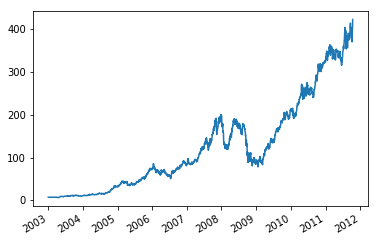

In [70]:
stocks['AAPL'].plot()

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


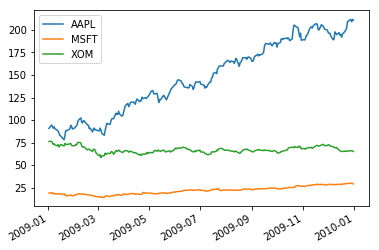

In [72]:
stocks.ix['2009'].plot()

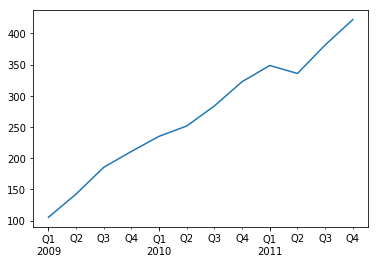

In [75]:
appl_q = stocks['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

### Rolling windows

In [78]:
stocks = stocks.asfreq('B').fillna(method='ffill')
stocks.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


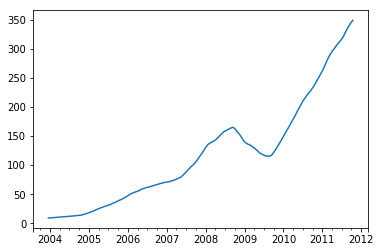

In [79]:
stocks['AAPL'].rolling(250).mean().plot()

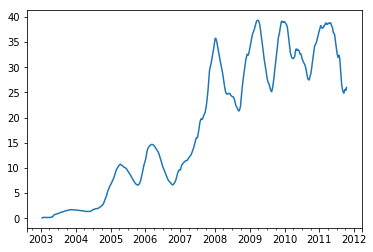

In [80]:
stocks['AAPL'].rolling(250, min_periods=10).std().plot()

**Question**: What does the parameter 250 do?


### Difference grouped by weekday

In [84]:
DAYS = ['0 Mon', '1 Tue', '2 Wed', '3 Thu', '4 Fri']

diff = stocks - stocks.shift(1)
diff.head()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.05,0.03,0.02
2003-01-06,0.00,0.38,0.72
2003-01-07,-0.02,0.41,-1.01
2003-01-08,-0.15,-0.62,-0.12


In [85]:
diff['weekday'] = diff.index.weekday

In [86]:
diff['weekday'].replace(dict(zip(range(5), DAYS)), inplace=True)

diff.head(1)

,AAPL,MSFT,XOM,weekday
2003-01-02,NaN,NaN,NaN,3 Thu


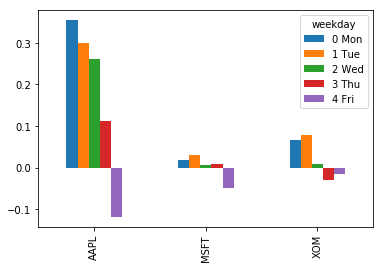

In [87]:
diff.groupby('weekday').mean().transpose().plot.bar()

More detailed examples are available in the pandas documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html